In [21]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set(style="whitegrid")
import os
import glob as gb
import cv2
import tensorflow as tf
import keras
from sklearn.model_selection import train_test_split
from tqdm import tqdm
from keras.callbacks import EarlyStopping
from tensorflow.keras import callbacks
from tensorflow.keras.models import Model
from tensorflow.keras.preprocessing.image import ImageDataGenerator

now to define the path ( to swtich it between jupyter notebook & kaggle kernel)

In [22]:
### for Kaggle
trainpath = '/kaggle/input/animal-faces/afhq/train'
testpath =  '/kaggle/input/animal-faces/afhq/val'


### for Jupyter
# trainpath = ''
# testpath = ''
# predpath = ''

# Open Folders

now let's first check the Train folder to have a look to its content

In [49]:
count2= []
for folder in  os.listdir(trainpath) : 
    files = gb.glob(pathname= str( trainpath +'/'+ folder + '/*.jpg'))
    print(f'For training data , found {len(files)} in folder {folder}')
    arc2=len(files)
    count2.append(arc2)

For training data , found 4739 in folder dog
For training data , found 4738 in folder wild
For training data , found 5153 in folder cat


In [ ]:
visual = {'Folders': ['cat','dog','wild'],
         'count':[count2[0],count2[1],countp[2]]}
visual2 = {'Folders': ['cat','dog','wild'],
         'count':[count[0],count[1],count[2]]}



ok , how about the test folder

In [50]:
count=[]
for folder in  os.listdir(testpath) : 
    files = gb.glob(pathname= str( testpath +'/' +folder + '/*.jpg'))
    print(f'For testing data , found {len(files)} in folder {folder}')
    arc=len(files)
    count.append(arc)

For testing data , found 500 in folder dog
For testing data , found 500 in folder wild
For testing data , found 500 in folder cat


_____
now for prediction folder

In [52]:
visual = {'Folders': ['cat','dog','wild'],
         'count':[count2[0],count2[1],count2[2]]}
visual2 = {'Folders': ['cat','dog','wild'],
         'count':[count[0],count[1],count[2]]}



<AxesSubplot: >

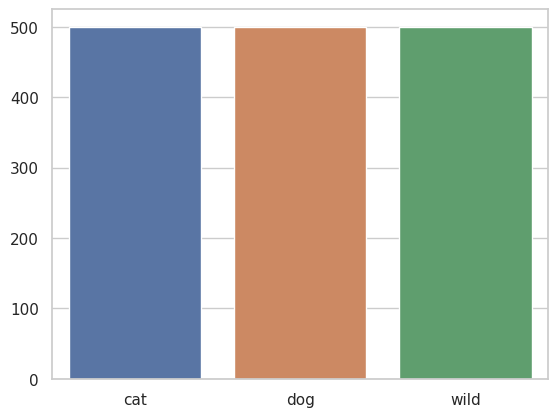

In [53]:
sns.barplot(x='Folders',y='count',data=visual2)

_____

# Checking Images

now we need to heck the images sizes , to know ow they looks like

since we have 6 categories , we first need to create a dictionary with their names & indices , also create a function to get the code back

<AxesSubplot: >

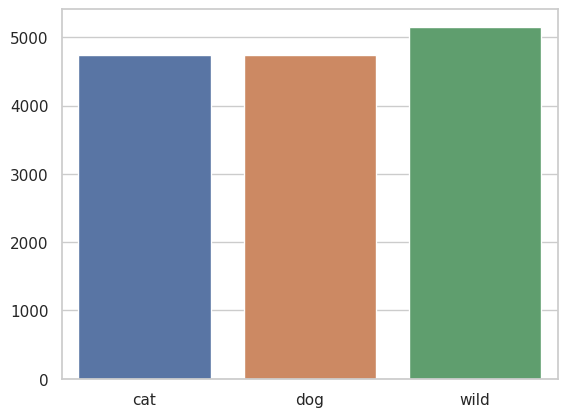

In [54]:
sns.barplot(x='Folders',y='count',data=visual)

In [25]:
code = {'cat':0 ,'dog':1,'wild':2} 

def getcode(n) : 
    for x , y in code.items() : 
        if n == y : 
            return x    

now how about the images sizes in train folder

In [26]:
size = []
for folder in  os.listdir(trainpath ) : 
    files = gb.glob(pathname= str( trainpath +'/'+ folder + '/*.jpg'))
    for file in files: 
        image = plt.imread(file)
        size.append(image.shape)
pd.Series(size).value_counts()

(512, 512, 3)    14630
dtype: int64

______

ok , almost all of them are 150,150,3 , how about test images ? 

In [27]:
size = []
for folder in  tqdm(os.listdir(testpath )) : 
    files = gb.glob(pathname= str( testpath +'/' + folder + '/*.jpg'))
    for file in files: 
        image = plt.imread(file)
        size.append(image.shape)
pd.Series(size).value_counts()

100%|██████████| 3/3 [00:06<00:00,  2.16s/it]


(512, 512, 3)    1500
dtype: int64

almost same ratios , now to prediction images 

ok , since almost all of pictures are 150,150,3 , we can feel comfort in using all pictures in our model , after resizing it in a specific amount

# Reading Images

now it's time to read all images & convert it into arrays

first we'll create a variable s , which refer to size , so we can change it easily 

let's use now size = 100 , so it will be suitable amount to contain accuracy without losing so much time in training

In [28]:
s = 200

In [29]:
X_train = []
y_train = []
for folder in  tqdm(os.listdir(trainpath)) : 
    files = gb.glob(pathname= str( trainpath +'/' + folder + '/*.jpg'))
    for file in tqdm(files): 
        image = cv2.imread(file)
        image_array = cv2.resize(image , (s,s))
        X_train.append(list(image_array))
        y_train.append(code[folder])
        
        

100%|██████████| 3/3 [01:28<00:00, 29.56s/it]


great , now how many items in X_train 

In [30]:
print(f'we have {len(X_train)} items in X_train')

we have 14630 items in X_train


also we have have a look to random pictures in X_train , and to adjust their title using the y value

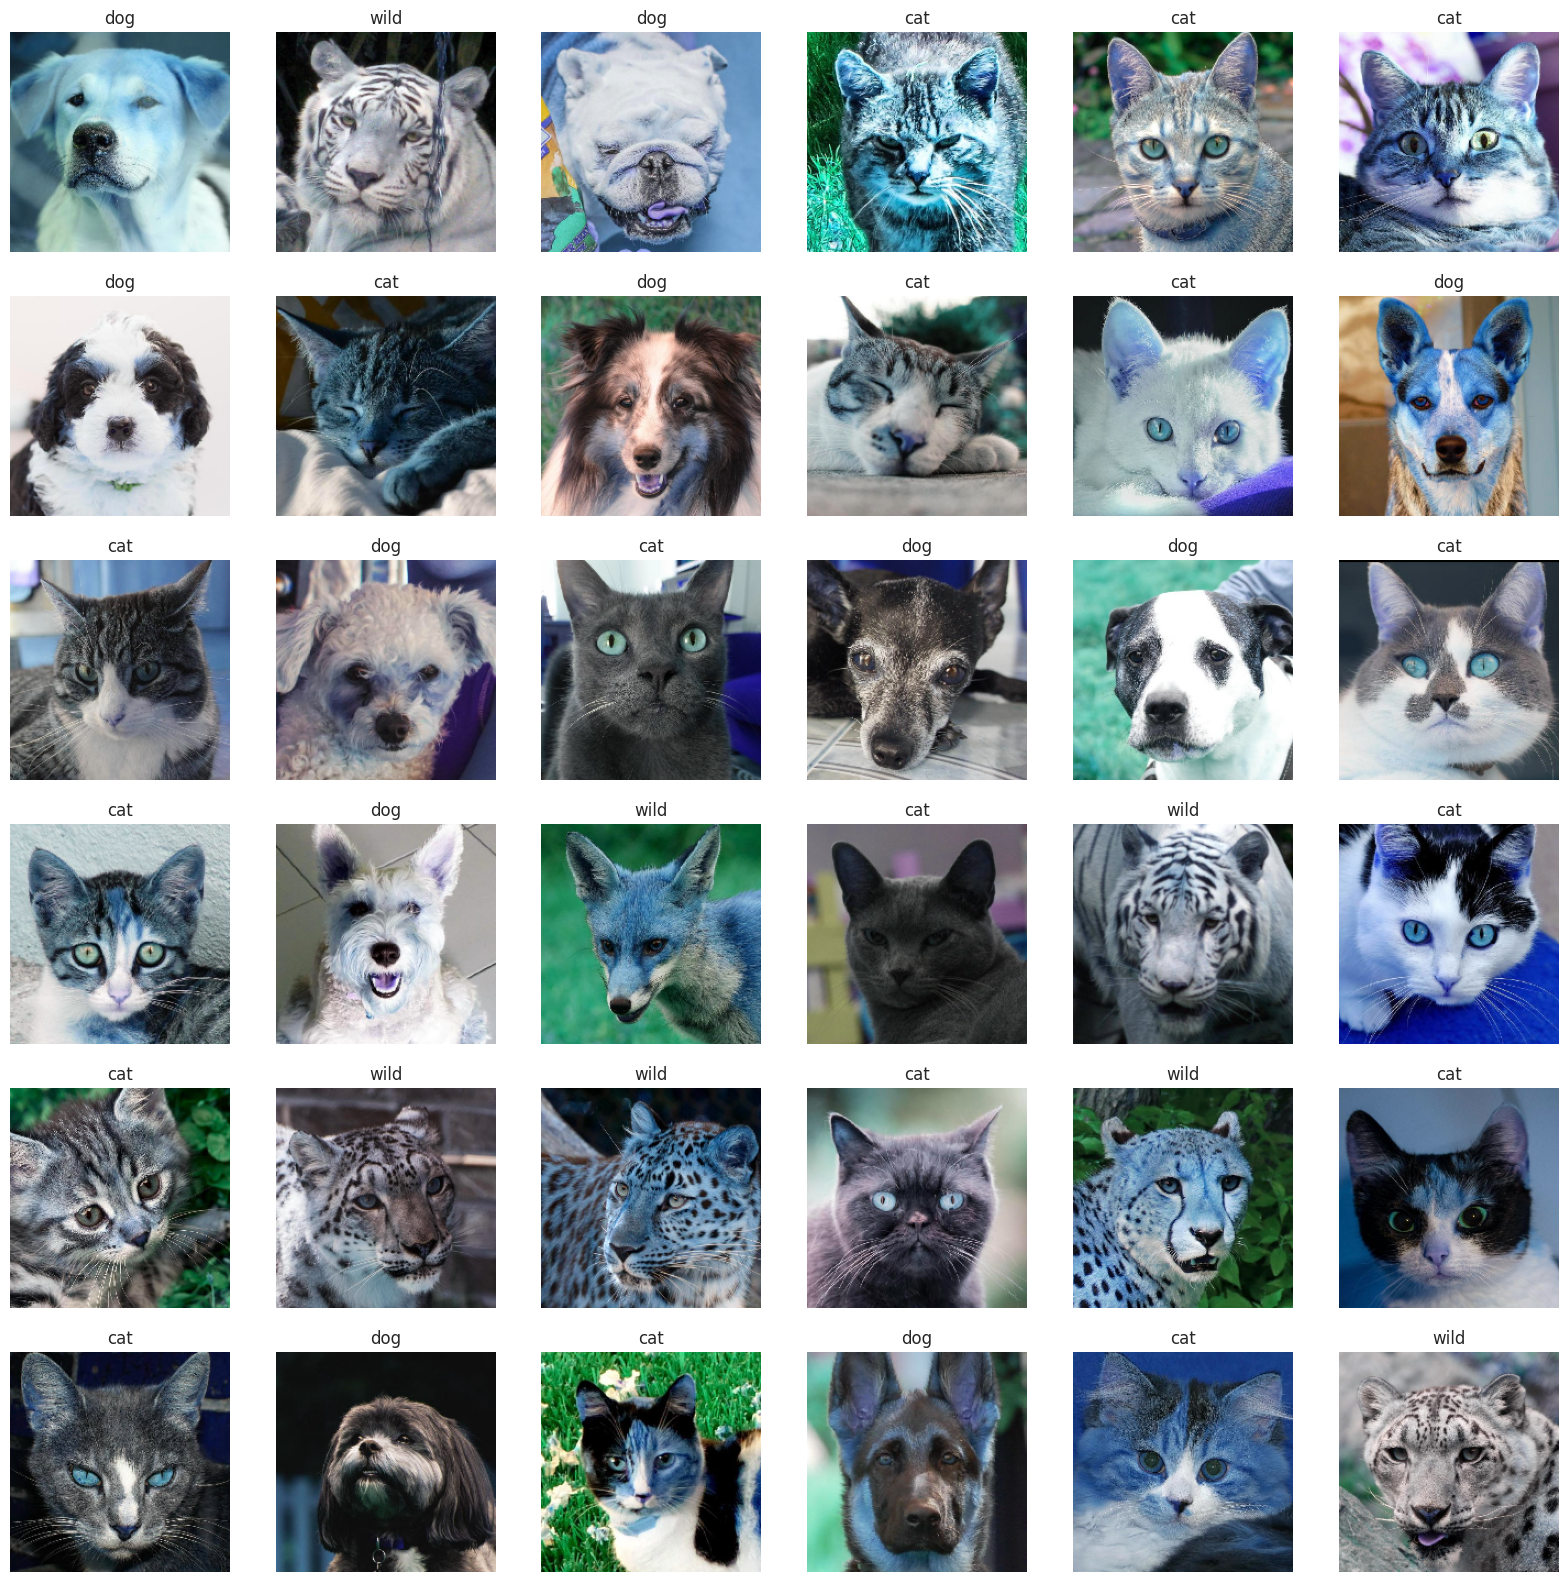

In [31]:
plt.figure(figsize=(20,20))
for n , i in enumerate(list(np.random.randint(0,len(X_train),36))) : 
    plt.subplot(6,6,n+1)
    plt.imshow(X_train[i])   
    plt.axis('off')
    plt.title(getcode(y_train[i]))

great , now to repeat same steps exactly in test data

In [32]:
X_test = []
y_test = []
for folder in  os.listdir(testpath) : 
    files = tqdm(gb.glob(pathname= str(testpath + '/' + folder + '/*.jpg')))
    for file in tqdm(files): 
        image = cv2.imread(file)
        image_array = cv2.resize(image , (s,s))
        X_test.append(list(image_array))
        y_test.append(code[folder])
        
        


100%|██████████| 500/500 [00:03<00:00, 162.87it/s]


In [33]:
print(f'we have {len(X_test)} items in X_test')

we have 1500 items in X_test


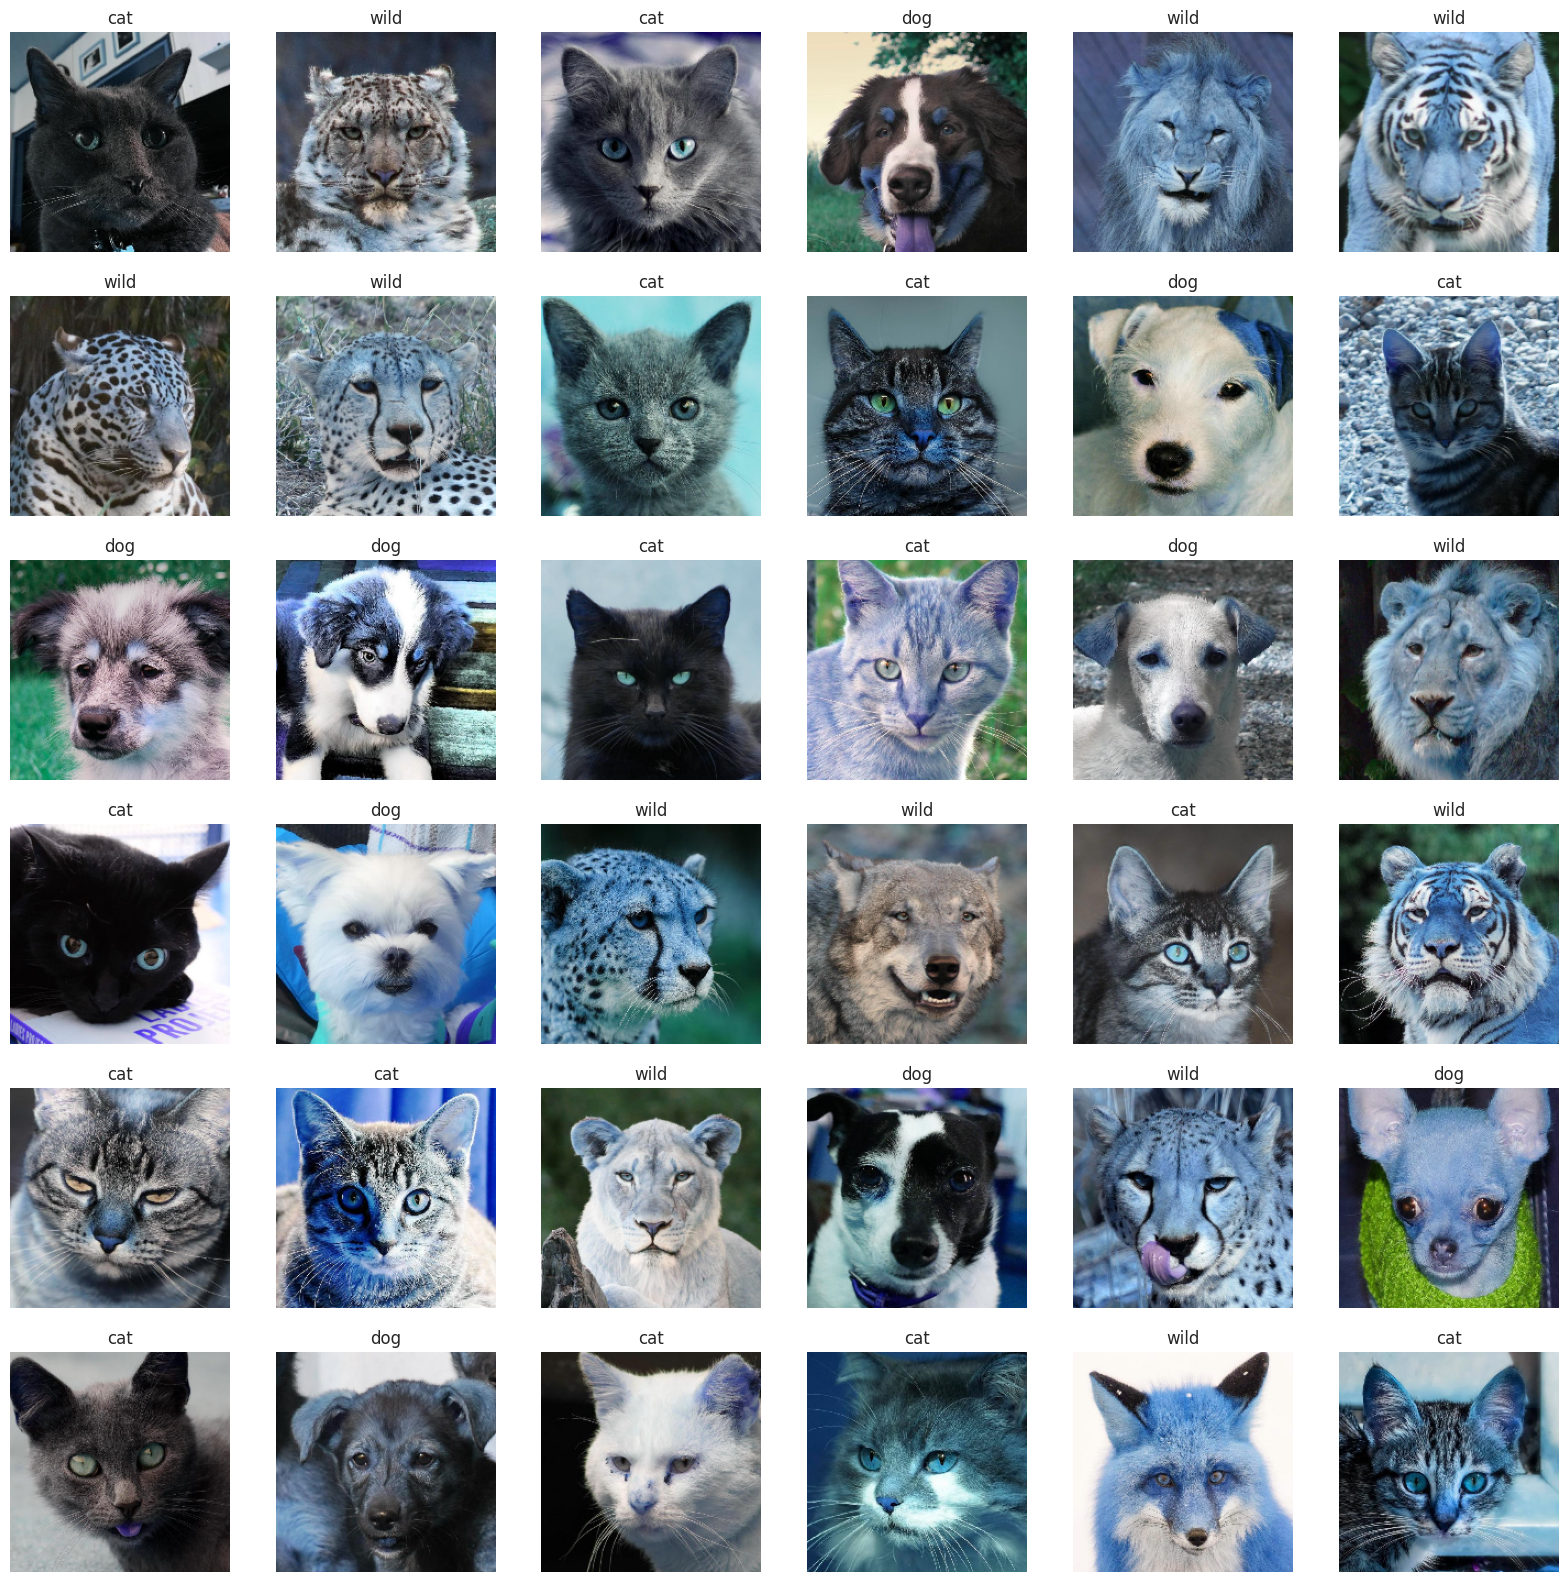

In [34]:
plt.figure(figsize=(20,20))
for n , i in enumerate(list(np.random.randint(0,len(X_test),36))) : 
    plt.subplot(6,6,n+1)
    plt.imshow(X_test[i])    
    plt.axis('off')
    plt.title(getcode(y_test[i]))

also with Prediction data , without having title ofcourse

In [35]:
"""
X_train = X_train.reshape(s, s).astype("float32") / 255
X_test = X_test.reshape(s, s).astype("float32") / 255

y_train = y_train.astype("float32")
y_test = y_test.astype("float32")
"""

'\nX_train = X_train.reshape(s, s).astype("float32") / 255\nX_test = X_test.reshape(s, s).astype("float32") / 255\n\ny_train = y_train.astype("float32")\ny_test = y_test.astype("float32")\n'

________

# Building The Model 

now we need to build the model to train our data

first to convert the data into arrays using numpy

In [36]:
X_train = np.array(X_train)
X_test = np.array(X_test)
y_train = np.array(y_train)
y_test = np.array(y_test)

print(f'X_train shape  is {X_train.shape}')
print(f'X_test shape  is {X_test.shape}')#
#print(f'X_pred shape  is {X_pred_array.shape}')
print(f'y_train shape  is {y_train.shape}')
print(f'y_test shape  is {y_test.shape}')



X_train shape  is (14630, 200, 200, 3)
X_test shape  is (1500, 200, 200, 3)
y_train shape  is (14630,)
y_test shape  is (1500,)


now to build the CNN model by Keras , using Conv2D layers , MaxPooling & Denses

In [37]:
KerasModel = keras.models.Sequential([
        keras.layers.Rescaling(1./255, input_shape=(s, s, 3)),
        keras.layers.Conv2D(256,kernel_size=(3,3),activation='relu'),
        keras.layers.MaxPool2D(4,4),
        keras.layers.Conv2D(100,kernel_size=(3,3),activation='relu'),
        keras.layers.MaxPool2D(4,4),
        keras.layers.Flatten() ,    
        #keras.layers.Dense(512,activation='relu') ,    
        keras.layers.Dense(256,activation='relu') ,    
        keras.layers.Dense(128,activation='relu') ,
        keras.layers.Dense(128,activation='relu') ,  
        keras.layers.Dropout(rate=0.2) ,            
        keras.layers.Dense(3,activation='sigmoid') ,    
        ])

now to compile the model , using adam optimizer , & sparse categorical crossentropy loss

In [38]:
KerasModel.compile(optimizer ='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

so how the model looks like ? 

In [39]:
print('Model Details are : ')
print(KerasModel.summary())

Model Details are : 
Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_1 (Rescaling)     (None, 200, 200, 3)       0         
                                                                 
 conv2d_2 (Conv2D)           (None, 198, 198, 256)     7168      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 49, 49, 256)      0         
 2D)                                                             
                                                                 
 conv2d_3 (Conv2D)           (None, 47, 47, 100)       230500    
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 11, 11, 100)      0         
 2D)                                                             
                                                                 
 flatten_1 (Flatten)         (Non

now to train the model , lets use 50 epochs now

In [40]:
epochs = 15
early_stop = EarlyStopping(monitor='val_loss',min_delta=0.0001, patience=5, restore_best_weights = True)
ThisModel = KerasModel.fit(X_train, y_train, epochs=epochs,batch_size=128,verbose=1,callbacks=[early_stop])

Epoch 1/15
115/115 [==============================] - 42s 346ms/step - loss: 0.5782 - accuracy: 0.7461
Epoch 2/15
115/115 [==============================] - 40s 348ms/step - loss: 0.2170 - accuracy: 0.9195
Epoch 3/15
115/115 [==============================] - 40s 346ms/step - loss: 0.1522 - accuracy: 0.9457
Epoch 4/15
115/115 [==============================] - 40s 347ms/step - loss: 0.1017 - accuracy: 0.9637
Epoch 5/15
115/115 [==============================] - 40s 347ms/step - loss: 0.0926 - accuracy: 0.9664
Epoch 6/15
115/115 [==============================] - 40s 348ms/step - loss: 0.0655 - accuracy: 0.9780
Epoch 7/15
115/115 [==============================] - 40s 347ms/step - loss: 0.0661 - accuracy: 0.9770
Epoch 8/15
115/115 [==============================] - 40s 347ms/step - loss: 0.0421 - accuracy: 0.9845
Epoch 9/15
115/115 [==============================] - 40s 347ms/step - loss: 0.0384 - accuracy: 0.9874
Epoch 10/15
115/115 [==============================] - 40s 347ms/step - l

how is the final loss & accuracy


In [41]:
ModelLoss, ModelAccuracy = KerasModel.evaluate(X_test, y_test)

print('Test Loss is {}'.format(ModelLoss))
print('Test Accuracy is {}'.format(ModelAccuracy ))

47/47 [==============================] - 3s 41ms/step - loss: 0.1322 - accuracy: 0.9740
Test Loss is 0.13216283917427063
Test Accuracy is 0.9739999771118164


ok , only 80% accuracy & can be increased by tuning the hyperparameters



_______

now to predict X test

In [59]:
y_pred = KerasModel.predict(X_test)
y_pred 

print('Prediction Shape is {}'.format(y_pred.shape))


47/47 [==============================] - 1s 22ms/step
Prediction Shape is (1500, 3)


In [56]:
y_pred =pd.DataFrame(y_pred)

In [60]:
y_pred

array([[1.4652588e-03, 9.9999690e-01, 9.1323359e-03],
       [2.1691730e-02, 9.9081236e-01, 3.7610561e-01],
       [5.8929846e-03, 9.9940300e-01, 1.6757955e-01],
       ...,
       [1.0000000e+00, 1.4410012e-04, 6.6313878e-05],
       [9.9999607e-01, 8.6317640e-03, 7.2330952e-02],
       [9.2039186e-01, 6.7588657e-01, 2.0719215e-01]], dtype=float32)

great

now it's time to redict X Predict

and to show random redicted pictures & its predicting category


<AxesSubplot: >

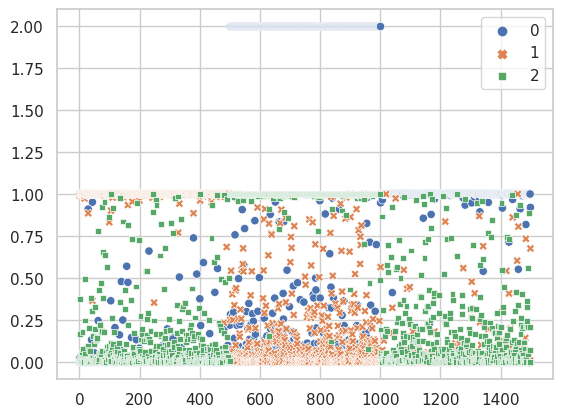

In [45]:
sns.scatterplot(y_test)
sns.scatterplot(y_pred)

In [62]:
ModelLoss, ModelAccuracy = KerasModel.evaluate(X_test, y_test)

print('Test Accuracy is {}'.format(ModelAccuracy ))

47/47 [==============================] - 1s 25ms/step - loss: 0.1322 - accuracy: 0.9740
Test Accuracy is 0.9739999771118164


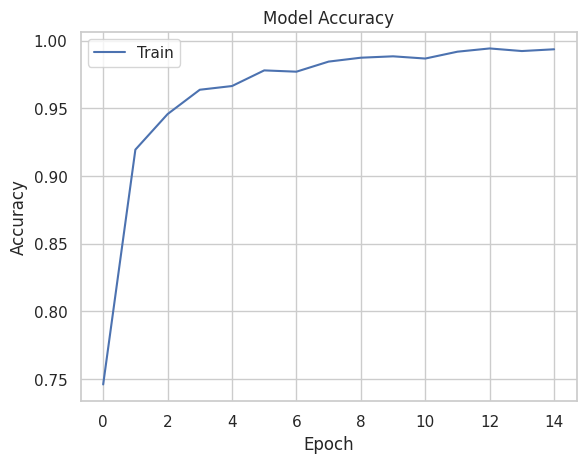

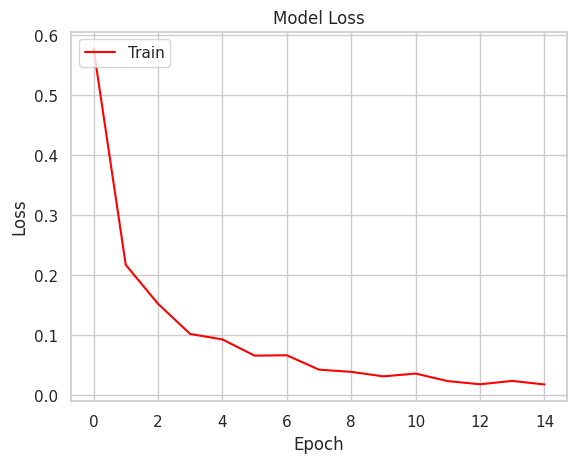

In [65]:


plt.plot(ThisModel.history['accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

plt.plot(ThisModel.history['loss'],color='red')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

              precision    recall  f1-score   support

           0       0.99      0.97      0.98       500
           1       0.96      0.98      0.97       500
           2       0.97      0.97      0.97       500

    accuracy                           0.97      1500
   macro avg       0.97      0.97      0.97      1500
weighted avg       0.97      0.97      0.97      1500



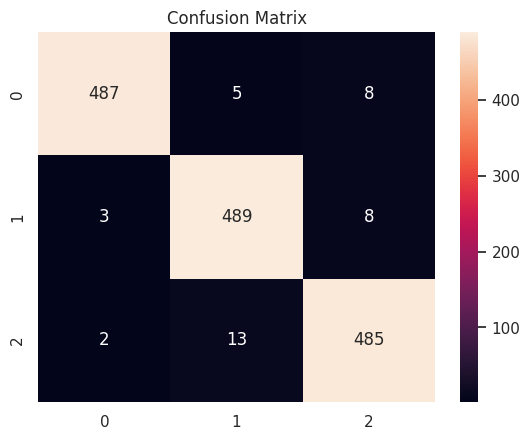

In [68]:

from sklearn.metrics import classification_report, confusion_matrix 
y_pred = [np.argmax(i) for i in y_pred]

print(classification_report(y_test,y_pred))
conf = confusion_matrix(y_test,y_pred)
sns.heatmap(conf,annot=True,fmt='d')
plt.title('Confusion Matrix')
plt.show()

